In [1]:
!nvidia-smi | grep "|   0"

|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |


#Updating Stuff

In [2]:
# Make ready for fast.ai
!curl -s https://course.fast.ai/setup/colab | bash
!pip -q install git+https://github.com/fastai/fastai.git -U

Updating fastai...
Done.


#Importing Libraries

In [0]:
import fastai
from fastai.text import *
from fastai import *
import pandas as pd
import glob
from numpy import random

#Downloading and preparing Traning Data 

##Downloading CSV files from task4 repo

In [0]:
subtaskA_URL = 'https://raw.githubusercontent.com/wangcunxiang/SemEval2020-Task4-Commonsense-Validation-and-Explanation/master/Training%20%20Data/subtaskA_data_all.csv'

In [0]:
subtaskA_Answers_URL = 'https://raw.githubusercontent.com/wangcunxiang/SemEval2020-Task4-Commonsense-Validation-and-Explanation/master/Training%20%20Data/subtaskA_answers_all.csv'

In [6]:
import urllib.request
urllib.request.urlretrieve(subtaskA_URL , '/content/subtaskA_data_all.csv')

('/content/subtaskA_data_all.csv', <http.client.HTTPMessage at 0x7f4f7f4ea0b8>)

In [7]:
urllib.request.urlretrieve(subtaskA_Answers_URL , '/content/subtaskA_answers_all.csv')

('/content/subtaskA_answers_all.csv',
 <http.client.HTTPMessage at 0x7f4f7f4ea550>)

##Read subtaskA_data_all.csv
subtaskA_data_all is the released training set of this task

In [8]:
df1 = pd.read_csv(subtaskA_URL , index_col=0)
df1

,sent0,sent1
id,,
0,He poured orange juice on his cereal.,He poured milk on his cereal.
1,He drinks apple.,He drinks milk.
2,Jeff ran a mile today,"Jeff ran 100,000 miles today"
3,A mosquito stings me,I sting a mosquito
4,A niece is a person.,A giraffe is a person.
...,...,...
9995,Mark ate a big bitter cherry pie,Mark ate a big sweet cherry pie
9996,Gloria wears a cat on her head,Gloria wears a hat on her head
9997,Harry went to the barbershop to have his hair cut,Harry went to the barbershop to have his glass...


In [0]:
#df1['Sentences_Seperated'] = df1[['sent0', 'sent1']].apply(lambda x: ' , '.join(x), axis=1)
#df1.drop(['sent0' , 'sent1'], axis=1, inplace=True)
#df1

##Read subtaskA_answers_all.csv

The labels are given in a different csv file

In [9]:
df2 = pd.read_csv(subtaskA_Answers_URL , header=None)
df2.columns = ['id', 'answers']
df2.set_index('id', inplace=True)
df2

,answers
id,
0,0
1,0
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,1


##Dataframe 
The final dataframe/Training set 

In [10]:
df = df1.merge(df2 , on='id')
df
#df.shape

,sent0,sent1,answers
id,,,
0,He poured orange juice on his cereal.,He poured milk on his cereal.,0
1,He drinks apple.,He drinks milk.,0
2,Jeff ran a mile today,"Jeff ran 100,000 miles today",1
3,A mosquito stings me,I sting a mosquito,1
4,A niece is a person.,A giraffe is a person.,1
...,...,...,...
9995,Mark ate a big bitter cherry pie,Mark ate a big sweet cherry pie,0
9996,Gloria wears a cat on her head,Gloria wears a hat on her head,0
9997,Harry went to the barbershop to have his hair cut,Harry went to the barbershop to have his glass...,1


##If you want to use from_csv

In [0]:
#Writing a pandas DataFrame to CSV file
# df.to_csv("training_all.csv")

In [0]:
# df[0:8000]

#Seperate training set & test set & validation set

8000 sampels for training data

1000 sampels for validation data

1000 samples for test data

In [13]:
df_training = df[0:8000]
df_valid = df[8000:9000]
df_test = df[9000:10000]
df_test = df_test.drop( 'answers' , axis = 1)
df_training

,sent0,sent1,answers
id,,,
0,He poured orange juice on his cereal.,He poured milk on his cereal.,0
1,He drinks apple.,He drinks milk.,0
2,Jeff ran a mile today,"Jeff ran 100,000 miles today",1
3,A mosquito stings me,I sting a mosquito,1
4,A niece is a person.,A giraffe is a person.,1
...,...,...,...
7995,you can use the pitcher to drink water,you can use the pitcher to climb the mountain,1
7996,I put my books in a shoebox,I put my books in a bookcase,0
7997,a kitchen is a place to cook,a kitchen is a place to rest,1


In [14]:
df_valid

,sent0,sent1,answers
id,,,
8000,New York is the capital city of Illinois,Chicago is the capital city of Illinois,0
8001,The poor countries are more livable than in ri...,The rich countries are more livable than poor ...,0
8002,Staying up late is harmful to our health.,Staying up late is helpful for our health.,1
8003,Studying hardly is useless.,Studying hardly is useful.,0
8004,a little baby can't feed itself,a little baby can feed itself,1
...,...,...,...
8995,she put her earrings back to the seasoning box,she put her earrings back to the jewelry box,0
8996,a short lunch break from work makes me eat qui...,a short lunch break from work makes me eat slowly,1
8997,every time I got a reply when he received my l...,every time I wrote a reply when he received my...,1


In [15]:
df_test

,sent0,sent1
id,,
9000,he lit a torch to see in the daytime,he lit a torch to see in the nighttime
9001,I put all my stuff in the drawer to travel,I put all my stuff in the luggage to travel
9002,he used a blow dryer before he washed his hair,he used a blow dryer after he washed his hair
9003,he used chopsticks to eat soup,he used spoons to eat soup
9004,DVD can be used to store information,DVD can be used to search for information
...,...,...
9995,Mark ate a big bitter cherry pie,Mark ate a big sweet cherry pie
9996,Gloria wears a cat on her head,Gloria wears a hat on her head
9997,Harry went to the barbershop to have his hair cut,Harry went to the barbershop to have his glass...


##If you want to use from_csv

In [0]:
df_training.to_csv("training-19000.csv")
df_test.to_csv("test-1000.csv")

#Tokenizing- ClsDataBunch

Sentences are seperated by a special tokens (mark_fields = true parameter)

In [0]:
data = TextClasDataBunch.from_df('/content', train_df= df_training, valid_df= df_valid, test_df= df_test  , text_cols= [0 , 1], label_cols =[2], mark_fields= True, bs=16)

In [0]:
data.show_batch()


text,target
"xxbos xxfld 1 xxmaj christopher xxmaj columbus sailed to xxmaj north xxmaj america with three ships : the xxmaj toyota , the xxmaj xxunk , and the xxmaj xxunk . xxfld 2 xxmaj christopher xxmaj columbus sailed to xxmaj north xxmaj america with three ships : the xxmaj santa xxmaj maria , the xxmaj xxunk , and the xxmaj xxunk .",0
xxbos xxfld 1 xxup birds xxup fly xxup in xxup the xxup sky xxup and xxup come xxup to xxup rest xxup on xxup tree xxup branches . xxfld 2 xxup flowers xxup fly xxup in xxup the xxup sky xxup and xxup come xxup to xxup rest xxup on xxup tree xxup branches .,1
"xxbos xxfld 1 xxup he xxup put xxup his xxup feet xxup in xxup the xxup oven , xxup on xxunk xxup degrees . xxfld 2 xxup he xxup put a xxup pie xxup in xxup the xxup oven , xxup on 360 xxup degrees .",0
"xxbos xxfld 1 xxmaj bottle is a glass or plastic container with a narrow neck , used for storing drinks or other liquids xxfld 2 xxmaj paper is a glass or plastic container with a narrow neck , used for storing drinks or other liquids",1
"xxbos xxfld 1 xxmaj if you enjoyed college as an adult , you might want to attend school as a child . xxfld 2 xxmaj if you enjoyed school as a child , you might want to attend college as an adult .",0


In [17]:
data,  data.classes

(TextClasDataBunch;
 
 Train: LabelList (8000 items)
 x: TextList
 xxbos xxfld 1 xxmaj he poured orange juice on his cereal . xxfld 2 xxmaj he poured milk on his cereal .,xxbos xxfld 1 xxmaj he drinks apple . xxfld 2 xxmaj he drinks milk .,xxbos xxfld 1 xxmaj jeff ran a mile today xxfld 2 xxmaj jeff ran xxunk miles today,xxbos xxfld 1 a mosquito xxunk me xxfld 2 i xxunk a mosquito,xxbos xxfld 1 a niece is a person . xxfld 2 a giraffe is a person .
 y: CategoryList
 0,0,1,1,1
 Path: /content;
 
 Valid: LabelList (1000 items)
 x: TextList
 xxbos xxfld 1 xxmaj new xxmaj york is the capital city of xxmaj xxunk xxfld 2 xxmaj chicago is the capital city of xxmaj xxunk,xxbos xxfld 1 xxmaj the poor countries are more xxunk than in rich countries . xxfld 2 xxmaj the rich countries are more xxunk than poor countries .,xxbos xxfld 1 xxmaj staying up late is harmful to our health . xxfld 2 xxmaj staying up late is helpful for our health .,xxbos xxfld 1 xxmaj studying xxunk is useless . xxfld 2 xxm

In [0]:
#data.vocab.itos[:50]
#data.vocab.stoi
#len(data.vocab.itos)
#t1 = data.train_ds[500][0] 
#t1
#t2 = data.train_ds[500][1]
#t2

#Classifier

In [0]:
learn_classifier = text_classifier_learner(data , AWD_LSTM, drop_mult=0)

In [19]:
learn_classifier.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


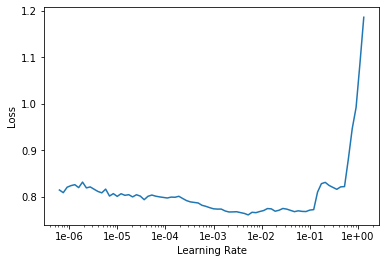

In [20]:
learn_classifier.recorder.plot()

##Training

In [21]:
learn_classifier.fit_one_cycle(2, 1e-04, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.719002,0.747314,0.511000,00:20
1,0.701705,0.733610,0.495000,00:20


In [0]:
learn_classifier.save("First")
learn_classifier.load('First');

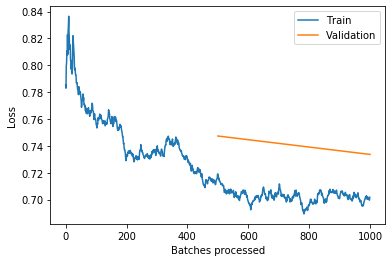

In [26]:
learn_classifier.recorder.plot_losses()

In [27]:
learn_classifier.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(5536, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(5536, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1200, out_features=50, bias=True)
      (2): ReLU(inplace=True)
      (3): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track

In [28]:
learn_classifier.unfreeze()
learn_classifier.summary()

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [61, 400]            0          False     
______________________________________________________________________
RNNDropout           [61, 1152]           0          False     
______________________________________________________________________
RNNDropout           [61, 1152]           0          False     
______________________________________________________________________
BatchNorm1d          [1200]               2,400      True      
______________________________________________________________________
Linear               [50]                 60,050     True      
______________________________________________________________________
ReLU                 [50]                 0          False     
______________________________________________________________________
BatchNorm1d          [50]                 100        True      
________________________________________________

In [29]:
for index, layer in enumerate(learn_classifier.layer_groups):
  print('Layer Group Index: ', index, layer)

Layer Group Index:  0 Sequential(
  (0): Embedding(5536, 400, padding_idx=1)
  (1): EmbeddingDropout(
    (emb): Embedding(5536, 400, padding_idx=1)
  )
)
Layer Group Index:  1 Sequential(
  (0): WeightDropout(
    (module): LSTM(400, 1152, batch_first=True)
  )
  (1): RNNDropout()
)
Layer Group Index:  2 Sequential(
  (0): WeightDropout(
    (module): LSTM(1152, 1152, batch_first=True)
  )
  (1): RNNDropout()
)
Layer Group Index:  3 Sequential(
  (0): WeightDropout(
    (module): LSTM(1152, 400, batch_first=True)
  )
  (1): RNNDropout()
)
Layer Group Index:  4 Sequential(
  (0): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1200, out_features=50, bias=True)
      (2): ReLU(inplace=True)
      (3): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Dropout(p=0.1, inplace=False)
      (5): Linear(in_features=50, out_featu

In [0]:
def summary_trainable(learner):
  result = []
  total_params_element = 0
  def check_trainable(module):
    nonlocal total_params_element
    if len(list(module.children())) == 0:
      num_param = 0
      num_trainable_param = 0
      num_param_numel = 0
      for parameter in module.parameters():
        num_param += 1
        if parameter.requires_grad:
          num_param_numel += parameter.numel()
          total_params_element += parameter.numel()
          num_trainable_param += 1

      result.append({'module': module, 'num_param': num_param , 'num_trainable_param' : num_trainable_param, 'num_param_numel': num_param_numel})
  learner.model.apply(check_trainable)
  
  print("{: <85} {: <17} {:,<20} {: <40}".format('Module Name', 'Total Parameters', 'Trainable Parameters', '# Elements in Trainable Parametrs'))
  for row in result:
    print("{: <85} {: <17} {: <20} {: <40,}".format(row['module'].__str__(), row['num_param'], row['num_trainable_param'], row['num_param_numel']))
  print('Total number of parameters elements {:,}'.format(total_params_element))

In [31]:
learn_classifier.freeze()
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
LSTM(400, 1152, batch_first=True)                                                     4                 0                    0                                       
LSTM(1152, 1152, batch_first=True)                                                    4                 0                    0                                       
LSTM(1152, 400, batch_first=True)                                                     4                 0                    0                                       
RNND

In [32]:
learn_classifier.freeze()
learn_classifier.freeze_to(-1)
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
LSTM(400, 1152, batch_first=True)                                                     4                 0                    0                                       
LSTM(1152, 1152, batch_first=True)                                                    4                 0                    0                                       
LSTM(1152, 400, batch_first=True)                                                     4                 0                    0                                       
RNND

In [33]:
learn_classifier.freeze()
learn_classifier.freeze_to(-2)
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
LSTM(400, 1152, batch_first=True)                                                     4                 0                    0                                       
LSTM(1152, 1152, batch_first=True)                                                    4                 0                    0                                       
LSTM(1152, 400, batch_first=True)                                                     4                 4                    2,486,400                               
RNND

In [34]:
learn_classifier.freeze()
learn_classifier.freeze_to(-3)
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
LSTM(400, 1152, batch_first=True)                                                     4                 0                    0                                       
LSTM(1152, 1152, batch_first=True)                                                    4                 4                    10,626,048                              
LSTM(1152, 400, batch_first=True)                                                     4                 4                    2,486,400                               
RNND

In [35]:
learn_classifier.freeze()
learn_classifier.freeze_to(-4)
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
Embedding(5536, 400, padding_idx=1)                                                   1                 0                    0                                       
LSTM(400, 1152, batch_first=True)                                                     4                 4                    7,160,832                               
LSTM(1152, 1152, batch_first=True)                                                    4                 4                    10,626,048                              
LSTM(1152, 400, batch_first=True)                                                     4                 4                    2,486,400                               
RNND

In [36]:
learn_classifier.freeze()
learn_classifier.freeze_to(-5) # equal to unfreeze
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 1                    2,214,400                               
Embedding(5536, 400, padding_idx=1)                                                   1                 1                    2,214,400                               
LSTM(400, 1152, batch_first=True)                                                     4                 4                    7,160,832                               
LSTM(1152, 1152, batch_first=True)                                                    4                 4                    10,626,048                              
LSTM(1152, 400, batch_first=True)                                                     4                 4                    2,486,400                               
RNND

In [37]:
learn_classifier.freeze()
learn_classifier.unfreeze()
summary_trainable(learn_classifier)

Module Name                                                                           Total Parameters  Trainable Parameters # Elements in Trainable Parametrs       
Embedding(5536, 400, padding_idx=1)                                                   1                 1                    2,214,400                               
Embedding(5536, 400, padding_idx=1)                                                   1                 1                    2,214,400                               
LSTM(400, 1152, batch_first=True)                                                     4                 4                    7,160,832                               
LSTM(1152, 1152, batch_first=True)                                                    4                 4                    10,626,048                              
LSTM(1152, 400, batch_first=True)                                                     4                 4                    2,486,400                               
RNND